# Computer Exercise 01 # 
## Kernel Density Estimation ##

#### Question for Discussion ####
If the goal is to randomly generate new digits, which approach is preferable:

(a) Estimate $p(\mathbf{x})$ from the entire dataset and then randomly select samples from this density, or

(b) Estimate $p(\mathbf{x}|ω_k)$ for each digit, and then select an integer k at random and draw a sample
from $p(\mathbf{x}|ω_k)$?

If it does not make any difference which approach is used, explain why.

>__Answer:__ It does not make any difference. Both methods are able to generate random data. While method (b) results in greater granularity, it is irrellevant to the goal. You can still derive random models using either method; be it generative or discriminative. Therefore, neither method is superior to the other.

### Load libraries and data ###

In [102]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# load the data
digits = load_digits()

#My edits go here:
images =digits.images
images.shape
print(images[1]) # print the second item in the array of images

data = digits.data
data.shape
print(data[1]) # print the second item in the array of data

#load_data()
#print(digits.DESCR)


[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


### PCA ###

#### Questions for Discussion ####
__(a)__ With 3-bit images, the pixel values of the digits have values from zero to fifteen. If the
64-dimensional feature space is partitioned into 64-dimensional unit cubes, with sixteen
bins for each feature how many cubes (bins) will there be?

>__Answer:__ There will be 64 x 16 = __1024 cubes (bins).__ 

__(b)__ If the dimension of the feature space is 12 instead of 64, how many bins will there be?

>__Answer:__ There will be 12 x 16 = __192 cubes (bins).__ 

__(c)__ Given that most of the 64-dimensional feature space would correspond to images that do
not resemble any digit, and may just look like random noise such as the one shown below. discuss the importance of reducing the dimension of the feature space, i.e., is the curse of dimensionality a serious issue for this problem. If so, speculate on what a reasonable dimension might be.

>__Answer:__ It is important to reduce the dimension of the of the feature space to reduce the noise. By reducing the dimensions you also reduce the amount of data needed. Therefore reducing the number of empty spaces and creating less noise. 
The curse of dimensionality is a serious issue for this problem. If the dimension is too large, then the estimate becomes too smooth and will require an exponentially large amount of training samples. However, if the dimension is reduced by too much then there won't be enough data to make an accurate classification and reduce performance. A feature space of 12 may be too small a reduction while a dimension of 64 would still require an exponentially large number of samples for each digit.
A reasonable dimension would likely be found somewhere in between. Thus, I would speculate that a dimension of either __49 or 36__ would be reasonable.

In [103]:
# project the 64-dimensional data to a lower dimension
pca = PCA()   #Default values are used
data = pca.fit_transform(digits.data)
#print(data[1])

### KDE ###

In [104]:
# Kernel density estimation
kde = KernelDensity().fit(data)  #Default values that are used

### Generate New Digits ###

In [105]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# MY EDITS GO HERE
#new_data = kde.sample(10, random_state=0)

### Plot Digits ###

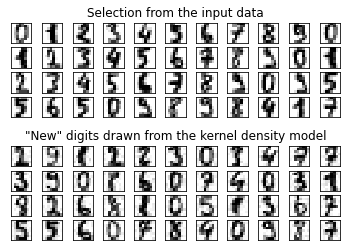

In [106]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

## Plot the Explained Variance in PCA ##

<function matplotlib.pyplot.show(close=None, block=None)>

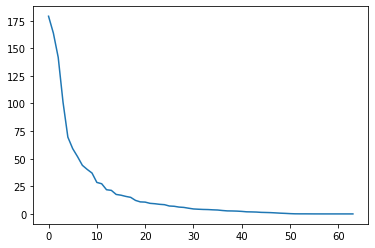

In [80]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

## Find the Number of Principal Components Using MLE ##

In [107]:
# project the 64-dimensional data using Minka's MLE
pca = PCA(n_components='mle')
data = pca.fit_transform(digits.data)
print('MLE: ', pca.n_components_, 'components')

MLE:  61 components


## Experiments: ##

__(a)__ 

In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# load the data
digits = load_digits()

#My edits go here:
images =digits.images
images.shape
#print(images[1]) # print the second item in the array of images

data = digits.data
data.shape
print(data[1]) # print the second item in the array of data


[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


__i.__ Use PCA to reduce the dimension of the dataset to some number less than 64. Try
to come up with a number that you feel might be a good one based on what you
know about the digits dataset.

In [109]:
# project the 64-dimensional data to a lower dimension
#EXPERIMENT (a) part i.
pca = PCA(n_components = 36) # 36 used as value.
data = pca.fit_transform(digits.data)
#print(data[1]) # print the second item in the array of data

[  7.9576113  -20.76869895   4.43950604 -14.89366444   5.89624892
  -6.48562205   2.12622742  -4.61593601   3.58745023  -1.07470365
  -5.38571557  -2.1295082   -2.55532918  -6.51698555  -2.29176357
  -2.1340453   -5.83931635   4.47842998  -1.95560923  -5.25571832
  -1.20587017  -4.83916903   0.86027451  -2.97422064   5.28908156
   0.11945237   2.18140335  -0.50875316   2.31409509   0.7606325
   0.64284303   1.29264017  -2.15009925   0.16596417   3.19483338
  -1.53383203]


__ii.__ Pick a value for the bandwidth to use in a Gaussian kernel, and estimate the density
function for the digits in the dataset. To start, you might try some number between
one and ten and see how it works. Note that since the range of values for the pixel
intensities are from zero to fifteen, then choosing a standard deviation much larger
than about five (variance of twenty-five) might not be the best choice.

In [110]:
# Kernel density estimation
kde = KernelDensity(bandwidth = 1).fit(data)  #bandwidth of 10

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

__iii.__

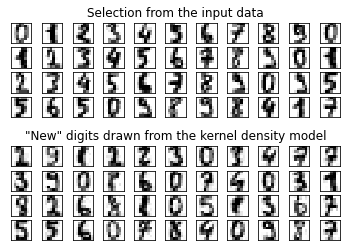

In [111]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

__(b)__

In [124]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# load the data
digits = load_digits()

# My edits go here:
images =digits.images
images.shape
#print(images[1]) # print the second item in the array of images

data = digits.data
data.shape
# print(data[1]) # print the second item in the array of data

(1797, 64)

In [126]:
# project the 64-dimensional data to a lower dimension
pca = PCA()   # default values are used
data = pca.fit_transform(digits.data)


# Kernel density estimation
kde = KernelDensity().fit(data)  #Default values that are used


# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)


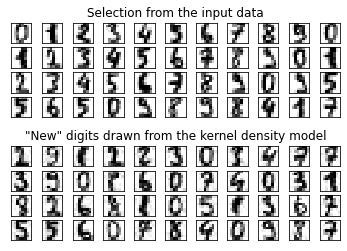

In [121]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

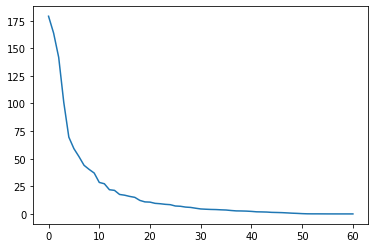

In [122]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

> dimension = 9?

__(c)__

In [123]:
# project the 64-dimensional data using Minka’s MLE
pca = PCA(n_components='mle')
data = pca.fit_transform(digits.data)
print('MLE: ', pca.n_components_, 'components')


MLE:  61 components


__i.__ What dimension does MLE estimate for PCA?
> Dimension of 61. 

__ii.__ How does this estimate compare to what you found in the previous part?
> There is a very large difference between the two. 



__(d)__ Set the bandwidth of your Gaussian kernel to some number in the range of two to five,
and generate random digits using n_components_ equal to 64, 30, 20, 15, 10, 5, and 2.
Describe what you observe and comment on what you think would be an appropriate
dimension to use for the feature space. Is it close to what you observed with the plot of
explained_variance_ versus n_components, or closer to what is estimated by MLE?

In [127]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# load the data
digits = load_digits()

# My edits go here:
images =digits.images
images.shape
#print(images[1]) # print the second item in the array of images

data = digits.data
data.shape
# print(data[1]) # print the second item in the array of data

(1797, 64)

 n_components = 64, Bandwidth = 3.5

In [128]:
# project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 64)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

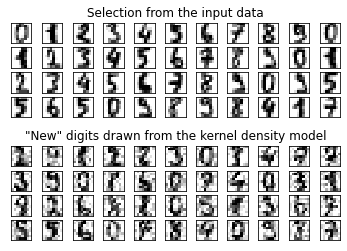

In [130]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 30

In [131]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 30)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)


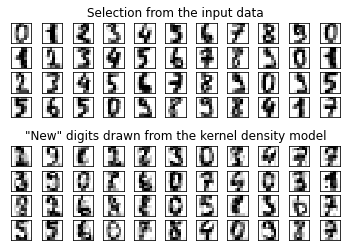

In [132]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 20

In [137]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 20)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

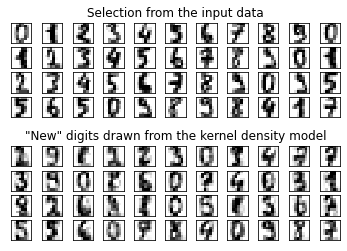

In [138]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 15

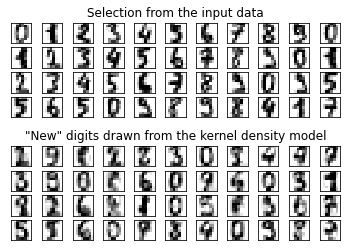

In [140]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 15)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 10 

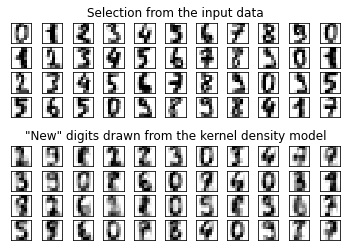

In [142]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 5

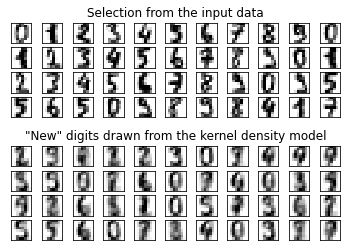

In [143]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 5)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

n_components = 2

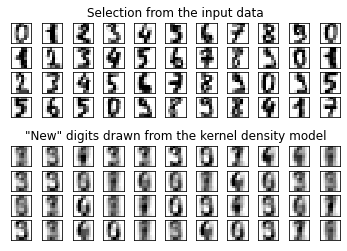

In [144]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 2)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

>__Observations:__ as n_components approaches 10, the digits generated become clearer. Digits generated with higher values apear with a lot of noise while digits under 10 become fuzzier and unreadable. It is closer to the what was observed using __explained_variance__.


__(e)__


bandwidth = 0.001

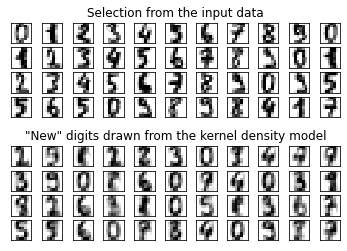

In [161]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 0.001).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

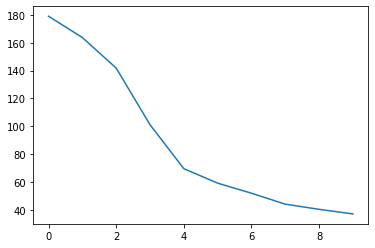

In [162]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth = 0.01

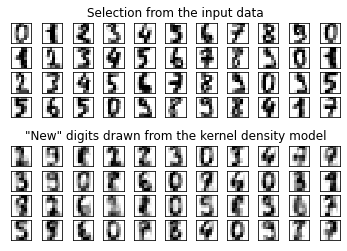

In [163]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3.5).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

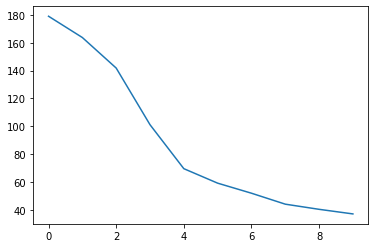

In [164]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth = 0.1

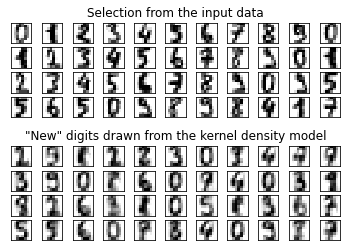

In [165]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 0.1).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

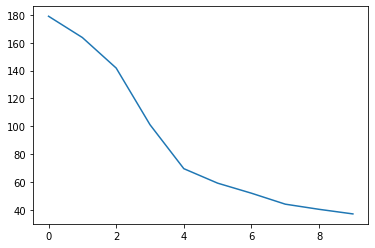

In [166]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth = 1

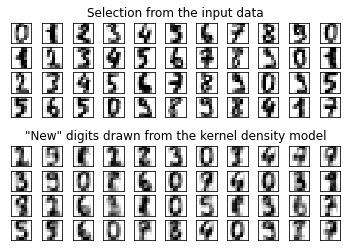

In [154]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 1.0).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

bandwidth = 2

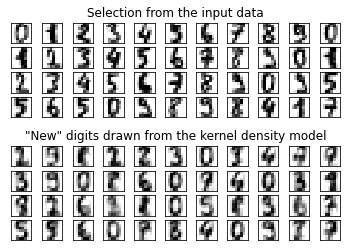

In [167]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 2).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

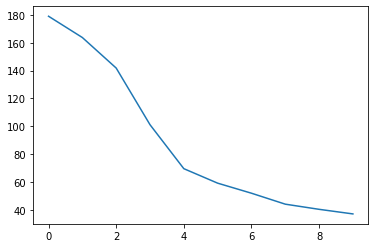

In [168]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth =  3

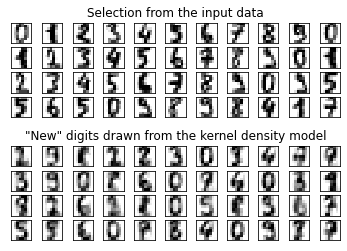

In [169]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 3).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

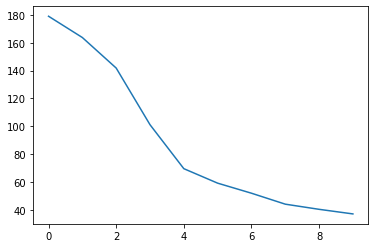

In [170]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth = 4

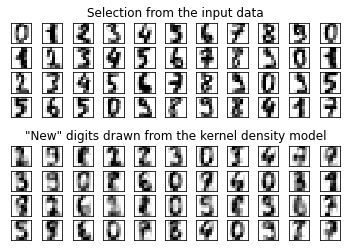

In [171]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 4).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

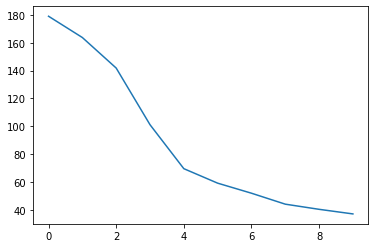

In [172]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

bandwidth = 5

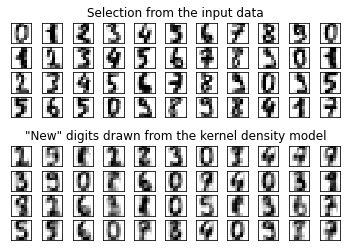

In [173]:
#project the 64-dimensional data to a lower dimension
pca = PCA(n_components = 10)   # default values are used
data = pca.fit_transform(digits.data)

# Kernel density estimation
kde = KernelDensity(bandwidth = 0.001).fit(data)  #bandwidth of 3.5

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

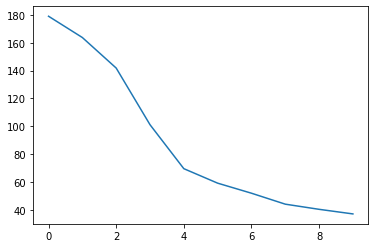

In [174]:
data = pca.fit_transform(digits.data)
v = pca.explained_variance_
plt.plot(v)
plt.show

> __Observations:__ bandwidths greater than 1 result in blurrier generated digits.

## Question ##
What happens as you let the bandwidth go to zero in KDE? What can you say about the new digits
that are generated? This question should be answered not based on what you see is generated, but
rather on what you know about what it means to let the bandwidth go to zero.

>__Answer:__ As bandwidth goes to 0 the curve becomes undefined. This is confirmed by the fact that bandwidth is directly tied to variance in the equation for the KDE which is in the denominator. As such, the bandwidth cannot be set to 0.

### Conclusions ###
Discuss what you have learned concerning the generation of random digits using KDE. How sensitive
is the generative model to the Gaussian bandwidth and the dimension of the feature space?

> Using KDE to generate random digits has been an interresting experience. It is clear that the generative model is sensitive with respect to both Gaussian bandwidth and the dimension of the feature space. However, it can be said that the model is more sensitive when it comes to changes in feature space as compared to bandwidth. A suitable dimension of reduced feature space is 10.In terms of suitable bandwidths, values close to 1 and below are preferable when generating digits. 

### Discussion ###
How would you modify the experiments above to design a generative Bayes classifier? Be as specific
as you can and give the decision rule that you would use to classify a new digit.